In [1]:
#!pip install gensim
#!pip install stanza
import stanza
import logging
import nltk
import gensim

import functions

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/gabri/Desktop/genre-recognition/train.csv")
df

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action
...,...,...,...,...
53995,80325,Untitled Monkeyshine/Ugly Brother Project,Two loser pest control buddies find themselves...,scifi
53996,84712,The Great Swindle,A seductive woman gets involved in relationshi...,thriller
53997,69801,When Men Get Pregnant,"Duyen, a wedding dress staff, who decides to c...",romance
53998,7678,Suttu Pidikka Utharavu,The people of a crowded colony in Coimbatore c...,action


In [3]:
len(np.unique(df['id']))

54000

In [4]:
lens = [len(x) for x in df['synopsis']]
df['synopsis_length'] = lens

titles_lens = [len(x) for x in df['movie_name']]
df['title_length'] = titles_lens

In [6]:
df[df['genre'] == 'action']['synopsis']

4        Buy Day - Four Men Widely - Apart in Life - By...
13                The mafia and their criminal activities.
14       Doc and the Amazing Five battle Captain Seas a...
15       A young woman is trained by a martial arts spe...
17       Khaki Vance Dubose is a Rodeo Girl. But then s...
                               ...                        
53947    The Queen's Messenger is called to convey vita...
53948    A martial artist with a tragic past seeks reve...
53953    A State Department employee finds an egg-shape...
53968    Experimented riders Sam and JP have a passion:...
53998    The people of a crowded colony in Coimbatore c...
Name: synopsis, Length: 5400, dtype: object

In [7]:
genres = np.unique(df['genre'].values)
genres

array(['action', 'adventure', 'crime', 'family', 'fantasy', 'horror',
       'mystery', 'romance', 'scifi', 'thriller'], dtype=object)

In [8]:
for genre in genres:
    lens = [len(x) for x in df[df['genre'] == genre]['synopsis']]

    total = sum(lens)
    #print(total)
    #print(len(lens))

    avg = total / len(lens)
    print('The mean length of', genre, 'is: ', avg)

The mean length of action is:  150.17037037037036
The mean length of adventure is:  151.17462962962964
The mean length of crime is:  148.5348148148148
The mean length of family is:  152.1501851851852
The mean length of fantasy is:  151.83314814814815
The mean length of horror is:  152.36574074074073
The mean length of mystery is:  153.40851851851852
The mean length of romance is:  149.95203703703703
The mean length of scifi is:  151.98666666666668
The mean length of thriller is:  152.24203703703705


In [5]:
#all the preprocessing for the training
df_train, x_train = functions.preprocessing(df=df, remove_useless_sentences = False, is_train = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)
print(df_train)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


          id                                         movie_name  \
0      44978                                           Super Me   
1      50185                                     Entity Project   
2      34131  Behavioral Family Therapy for Serious Psychiat...   
3      78522                                      Blood Glacier   
4       2206                                      Apat na anino   
...      ...                                                ...   
53995  80325          Untitled Monkeyshine/Ugly Brother Project   
53996  84712                                  The Great Swindle   
53997  69801                              When Men Get Pregnant   
53998   7678                             Suttu Pidikka Utharavu   
53999  33970                                    Margo the Mouse   

                                                synopsis     genre  \
0      A young scriptwriter starts bringing valuable ...   fantasy   
1      A director and her friends renting a haunted h..

In [6]:
df['synopsis_clean'] = x_train

In [7]:
df.head()

,id,movie_name,synopsis,genre,synopsis_length,title_length,synopsis_clean
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy,141,8,"[young, scriptwriter, start, bringing, valuabl..."
1,50185,Entity Project,A director and her friends renting a haunted h...,horror,120,14,"[director, friend, renting, haunted, house, ca..."
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family,164,59,"[educational, video, family, family, therapist..."
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi,128,13,"[scientist, working, austrian, alp, discover, ..."
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action,141,13,"[buy, day, men, widely, apart, life, night, sh..."


## Plots

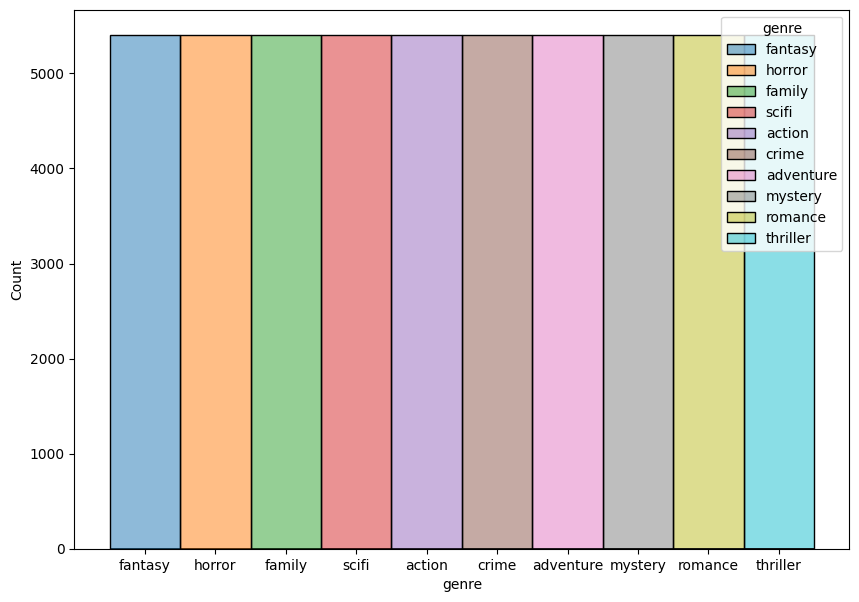

In [20]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x="genre", hue='genre')
plt.show()

In [21]:
df.isnull().sum()

id                0
movie_name        0
synopsis          0
genre             0
synopsis_clean    0
dtype: int64

<Axes: xlabel='synopsis_length', ylabel='genre'>

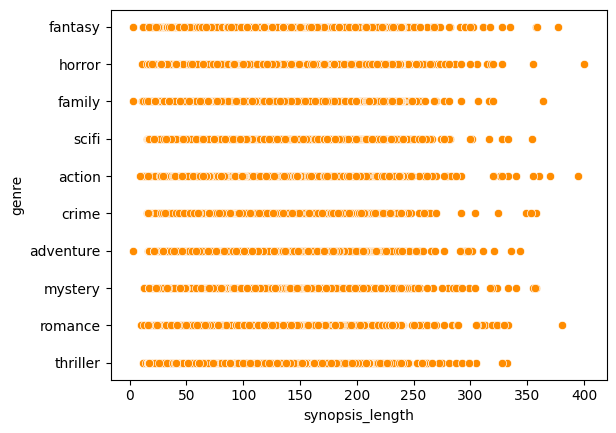

In [31]:
sns.scatterplot(data=df, x='synopsis_length', y='genre', c='darkorange')

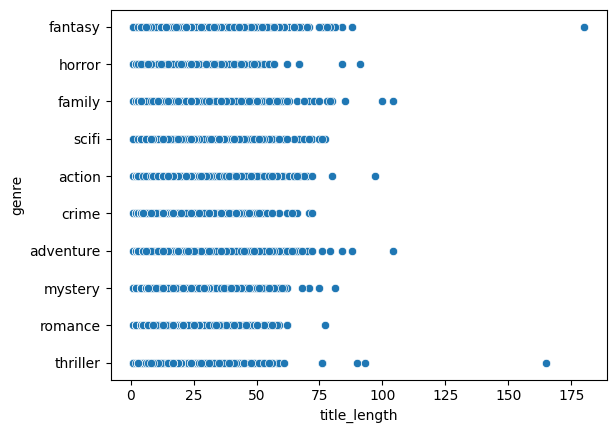

In [32]:
sns.scatterplot(data=df, x='title_length', y='genre')
plt.show()

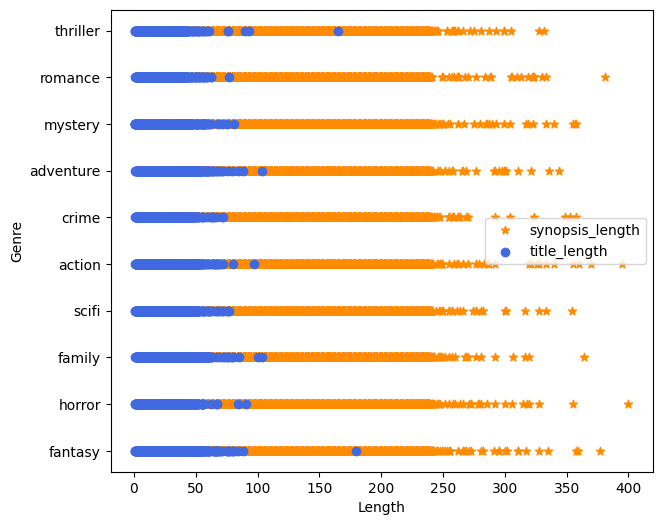

In [16]:
plt.figure(figsize=(7,6))
plt.scatter(df['synopsis_length'], 
            df['genre'], color='darkorange', marker='*', label='synopsis_length')
plt.scatter(df['title_length'], 
            df['genre'], color='royalblue',label='title_length')
plt.xlabel('Length')
plt.ylabel('Genre')
plt.legend()
plt.show()

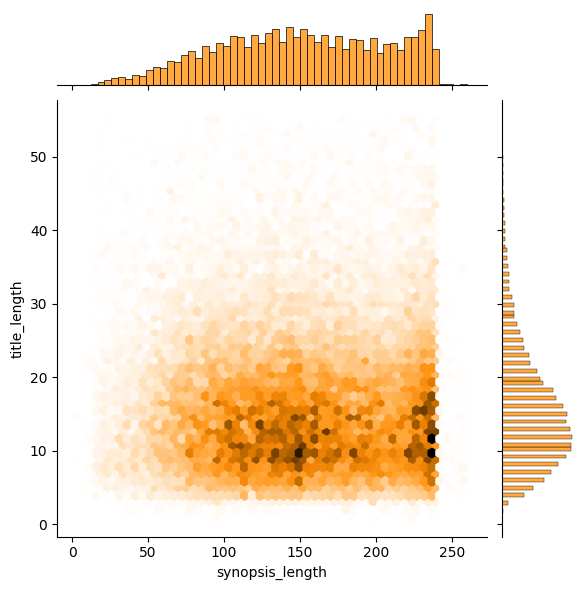

In [32]:
# Removing extreme values
filtered_df = df[~((df['synopsis_length'] > 260) | (df['title_length'] > 55))]

x = filtered_df['synopsis_length']
y = filtered_df['title_length']

sns.jointplot(data=df, x=filtered_df['synopsis_length'], y=filtered_df['title_length'], kind='hex', color="darkorange")
plt.show()

# TESTS

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.values
y = np.array(df['genre'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [ ]:
X_train.shape

(37800, 4)

In [ ]:
df_new = pd.DataFrame(X_train)
df_new

,0,1,2,3
0,10694,Iron Man,"After being held captive in an Afghan cave, bi...",adventure
1,82343,Bullitt County,An action/thriller set in 1977 about four frie...,thriller
2,283,Hacked,Crichton-esque techno-thriller about hackers a...,action
3,37655,Lux-Flux,Two beautiful ladies traveling in space and ti...,fantasy
4,26724,Blitz,A tough cop is dispatched to take down a seria...,crime
...,...,...,...,...
37795,22247,Vice Squad,"A single mother prostitute, who goes by the na...",crime
37796,18762,Moonlighters,Three German brothers trying to save their far...,crime
37797,63666,Lifeforce,A race of space vampires arrives in London and...,romance
37798,61685,Sex and Justice,A pair of frustrated detectives and a confesse...,mystery


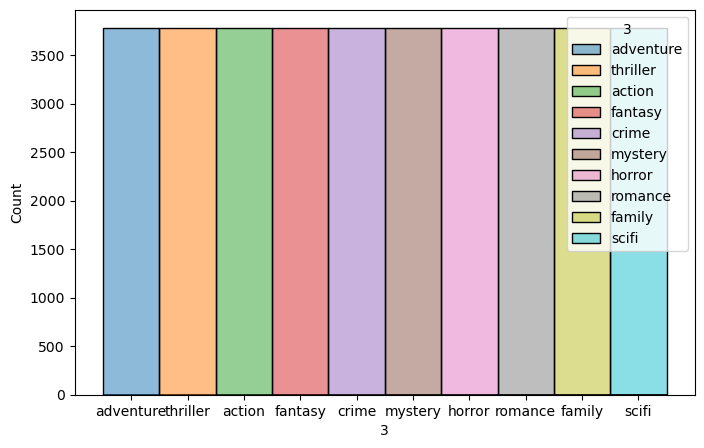

In [ ]:
plt.figure(figsize=(8,5))

sns.histplot(data=df_new, x=3, hue=3)
plt.show()

#### validation set:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

In [ ]:
y_val.shape

(7560,)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(30240, 4)
(7560, 4)
(16200, 4)


In [ ]:
pd.DataFrame(X_val)

,0,1,2,3
0,64167,Vremya zhelaniy,A strong willed woman aims to make connections...,romance
1,51643,Kitty Baby,"Office misfit Darlene Henderson, AKA ""Kitty"", ...",horror
2,54772,The Preview Murder Mystery,A public relations man for a movie studio uses...,mystery
3,78731,Demise,"After the beginning of a zombie apocalypse, a ...",scifi
4,71392,"Darling, How Could You!",When an imaginative girl has fantasies that he...,romance
...,...,...,...,...
7555,77232,Three Supermen of the West,The Three Supermen accidentally use Prof. Aris...,scifi
7556,82851,Dilli Gang,Dilli Gang is the story of an old man targeted...,thriller
7557,51556,Condemned,Malcolm lost everything to the recession. To p...,horror
7558,44560,Red Riding Hood,Grandma is babysitting her two grandkids. The ...,fantasy


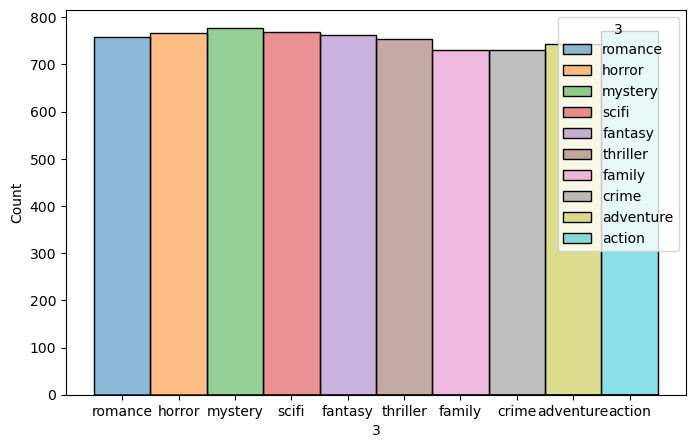

In [ ]:
df_new = pd.DataFrame(X_val)
df_new

plt.figure(figsize=(8,5))

sns.histplot(data=df_new, x=3, hue=3)
plt.show()

In [ ]:
df_test = pd.DataFrame(X_test)
df_test

,0,1,2,3
0,48729,Flesh for the Inferno,A local community group volunteers to prepare ...,horror
1,64007,Mother and Daughter,A former movie queen and her daughter both com...,romance
2,66395,A Colorful Romance,"In a fantasy world of black and white, a young...",romance
3,86121,Salt Creek,"Alison and Maria, two young women backpackers,...",thriller
4,82458,Europa Report,An international crew of astronauts undertakes...,thriller
...,...,...,...,...
16195,40742,Intermedium,An obsessive-compulsive teenager searches for ...,fantasy
16196,8229,Operation Trojan Horse,"During the German occupation, Greek commandos ...",action
16197,24885,The Threat,Vicious hood 'Red' Kluger escapes from Folsom ...,crime
16198,83407,Medium,"Story of four people in Sopot in 1933, mysteri...",thriller


In [ ]:
df_val = pd.DataFrame(X_val)
df_val

,0,1,2,3
0,64167,Vremya zhelaniy,A strong willed woman aims to make connections...,romance
1,51643,Kitty Baby,"Office misfit Darlene Henderson, AKA ""Kitty"", ...",horror
2,54772,The Preview Murder Mystery,A public relations man for a movie studio uses...,mystery
3,78731,Demise,"After the beginning of a zombie apocalypse, a ...",scifi
4,71392,"Darling, How Could You!",When an imaginative girl has fantasies that he...,romance
...,...,...,...,...
7555,77232,Three Supermen of the West,The Three Supermen accidentally use Prof. Aris...,scifi
7556,82851,Dilli Gang,Dilli Gang is the story of an old man targeted...,thriller
7557,51556,Condemned,Malcolm lost everything to the recession. To p...,horror
7558,44560,Red Riding Hood,Grandma is babysitting her two grandkids. The ...,fantasy


## Cleaning tests

In [ ]:
from nltk.corpus import stopwords

df_train = pd.DataFrame(X_train)
df_train

,0,1,2,3
0,29794,The Bar Mitzvah,The Bar Mitzvah is a movie written by Mark A. ...,family
1,85462,Avatharam,"When Madhavan gets to know that Moorthy, a cri...",thriller
2,42623,Detective Dee: The Four Heavenly Kings,Detective Dee is forced to defend himself agai...,fantasy
3,29401,Peter Pan 2: Return to Never Land,"In London during World War II, this is the sto...",family
4,8542,Homeboys,A look at life on the streets focuses on Hispa...,action
...,...,...,...,...
30235,17149,The Whip Against Murderous Mummies,El Látigo must face some Mayan mummies with su...,adventure
30236,36320,Sow,"With tense psychological elements, this visual...",fantasy
30237,48956,Killer Movie,A reality TV director copes with a spoiled cel...,horror
30238,80605,Ultrainocencia,Does God exist? Two blessed and rather bold te...,scifi


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# Define function to lemmatize each word with its POS tag

# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
synopsis_list = list(df_train[2])
synopsis_clean = []

# clean the df synopsis:
for e in synopsis_list:
    tokenized_text = nltk.word_tokenize(e.lower())

    # pos-tagging:
    token_pos = nltk.pos_tag(tokenized_text)
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), token_pos))

    # lemmatization
    lemmatized_words = []

    for word in wordnet_tagged:
        if word[1] != None:
            item = wnl.lemmatize(word[0], pos=word[1])
            lemmatized_words.append(item)
        else:
            lemmatized_words.append(word[0])

    clean = lemmatized_words

    #tokenized_text = set(token_pos)
    #clean = set(tokenized_text.difference(stopwords.words('english')))

    synopsis_clean.append(clean)

In [ ]:
df_train['synopsis_clean'] = synopsis_clean

In [ ]:
print(df_train[2][2])
type(df_train['synopsis_clean'][2])

Detective Dee is forced to defend himself against the accusations of Empress Wu while investigating a crime spree.


list

In [ ]:
print(df_train[2][2])
df_train['synopsis_clean'][2]

Detective Dee is forced to defend himself against the accusations of Empress Wu while investigating a crime spree.


['detective',
 'dee',
 'be',
 'force',
 'to',
 'defend',
 'himself',
 'against',
 'the',
 'accusation',
 'of',
 'empress',
 'wu',
 'while',
 'investigate',
 'a',
 'crime',
 'spree',
 '.']

In [ ]:
df_train

,0,1,2,3,synopsis_clean
0,29794,The Bar Mitzvah,The Bar Mitzvah is a movie written by Mark A. ...,family,"[the, bar, mitzvah, be, a, movie, write, by, m..."
1,85462,Avatharam,"When Madhavan gets to know that Moorthy, a cri...",thriller,"[when, madhavan, get, to, know, that, moorthy,..."
2,42623,Detective Dee: The Four Heavenly Kings,Detective Dee is forced to defend himself agai...,fantasy,"[detective, dee, be, force, to, defend, himsel..."
3,29401,Peter Pan 2: Return to Never Land,"In London during World War II, this is the sto...",family,"[in, london, during, world, war, ii, ,, this, ..."
4,8542,Homeboys,A look at life on the streets focuses on Hispa...,action,"[a, look, at, life, on, the, street, focus, on..."
...,...,...,...,...,...
30235,17149,The Whip Against Murderous Mummies,El Látigo must face some Mayan mummies with su...,adventure,"[el, látigo, must, face, some, mayan, mummy, w..."
30236,36320,Sow,"With tense psychological elements, this visual...",fantasy,"[with, tense, psychological, element, ,, this,..."
30237,48956,Killer Movie,A reality TV director copes with a spoiled cel...,horror,"[a, reality, tv, director, cope, with, a, spoi..."
30238,80605,Ultrainocencia,Does God exist? Two blessed and rather bold te...,scifi,"[do, god, exist, ?, two, bless, and, rather, b..."


#### stopwords removal

In [ ]:
from tqdm import tqdm

synopsis_list = list(df_train['synopsis_clean'])
synopsis_clean_nostopwords = []

for e in tqdm(synopsis_list):
    tokenized_text = set(e)
    clean = set(tokenized_text.difference(stopwords.words('english')))

    synopsis_clean_nostopwords.append(clean)

df_train['no_stopwords'] = synopsis_clean_nostopwords

100%|██████████| 30240/30240 [00:09<00:00, 3339.54it/s]


In [ ]:
df_train

,0,1,2,3,synopsis_clean,no_stopwords
0,29794,The Bar Mitzvah,The Bar Mitzvah is a movie written by Mark A. ...,family,"[the, bar, mitzvah, be, a, movie, write, by, m...","{,, boy, full, grow, start, movie, a., middle,..."
1,85462,Avatharam,"When Madhavan gets to know that Moorthy, a cri...",thriller,"[when, madhavan, get, to, know, that, moorthy,...","{madhavan, ,, crime, responsible, know, withou..."
2,42623,Detective Dee: The Four Heavenly Kings,Detective Dee is forced to defend himself agai...,fantasy,"[detective, dee, be, force, to, defend, himsel...","{crime, defend, force, dee, investigate, empre..."
3,29401,Peter Pan 2: Return to Never Land,"In London during World War II, this is the sto...",family,"[in, london, during, world, war, ii, ,, this, ...","{,, jane, daughter, london, must, wendy, come,..."
4,8542,Homeboys,A look at life on the streets focuses on Hispa...,action,"[a, look, at, life, on, the, street, focus, on...","{law, hispanic, look, focus, brother, street, ..."
...,...,...,...,...,...,...
30235,17149,The Whip Against Murderous Mummies,El Látigo must face some Mayan mummies with su...,adventure,"[el, látigo, must, face, some, mayan, mummy, w...","{látigo, ,, power, mayan, various, el, superhu..."
30236,36320,Sow,"With tense psychological elements, this visual...",fantasy,"[with, tense, psychological, element, ,, this,...","{,, blend, element, challenging, fantasy, musi..."
30237,48956,Killer Movie,A reality TV director copes with a spoiled cel...,horror,"[a, reality, tv, director, cope, with, a, spoi...","{crew, go, mask, satire, tv, start, killer, re..."
30238,80605,Ultrainocencia,Does God exist? Two blessed and rather bold te...,scifi,"[do, god, exist, ?, two, bless, and, rather, b...","{intend, bless, experiment, adán, two, religio..."


In [ ]:
print(df_train[2][2])
print(df_train['synopsis_clean'][2])
print(df_train['no_stopwords'][2])

Detective Dee is forced to defend himself against the accusations of Empress Wu while investigating a crime spree.
['detective', 'dee', 'be', 'force', 'to', 'defend', 'himself', 'against', 'the', 'accusation', 'of', 'empress', 'wu', 'while', 'investigate', 'a', 'crime', 'spree', '.']
{'crime', 'defend', 'force', 'dee', 'investigate', 'empress', 'detective', 'spree', 'accusation', 'wu', '.'}


#### columns renaming:

In [ ]:
df_train.rename(columns={0: 'id', 1: 'movie_name', 2:'synopsis', 3:'genre'}, inplace=True)

In [ ]:
df_train.head(1)

,id,movie_name,synopsis,genre,synopsis_clean,no_stopwords
0,29794,The Bar Mitzvah,The Bar Mitzvah is a movie written by Mark A. ...,family,"[the, bar, mitzvah, be, a, movie, write, by, m...","{,, boy, full, grow, start, movie, a., middle,..."


#### genres lexicons:

In [ ]:
genres = np.unique(df['genre'].values)
# final output:
lexicon = {}

for genre in tqdm(genres):
    genre_lexicon = []
    output = df_train[df_train['genre'] == genre]['synopsis_clean']
    output_list = list(output)

    for e in output_list:
        genre_lexicon.extend(e)

    lexicon[genre] = genre_lexicon

100%|██████████| 10/10 [00:00<00:00, 97.70it/s]


In [ ]:
print(lexicon['action'])

['a', 'look', 'at', 'life', 'on', 'the', 'street', 'focus', 'on', 'hispanic', 'brother', 'who', 'operate', 'on', 'opposite', 'side', 'of', 'the', 'law', 'in', 'crime-riddled', 'east', 'los', 'angeles', '.', 'when', 'her', 'son', 'be', 'kidnap', ',', 'the', 'inventor', 'of', 'a', 'time', 'machine', 'team', 'up', 'with', 'multiple', 'version', 'of', 'her', 'future', 'self', 'to', 'rescue', 'him', '.', 'two', 'u.s.', 'border', 'patrolman', 'find', 'a', 'buried', '20+', 'year', 'old', 'jeep', 'in', 'the', 'desert', 'with', 'a', 'skeleton', ',', 'rifle', 'and', '$', '800,000', '.', 'they', 'keep', 'the', 'money', '.', 'suddenly', ',', 'the', 'fbi', 'show', 'a', 'lot', 'of', 'interest', 'in', 'the', 'car', '.', 'joe', 'tyler', 'be', 'an', 'under', 'cover', 'agent', ',', 'he', 'turn', 'to', 'drink', 'when', 'his', 'world', 'be', 'turn', 'upside', 'down', 'lose', 'his', 'job', 'and', 'wife', '.', 'joe', "'s", 'next', 'choice', 'be', 'vital', 'live', 'or', 'die', 'he', 'must', 'move', 'on', '.'

#### Frequencies:

In [ ]:
freq_dist = nltk.FreqDist(lexicon['scifi'])
freq_dist

FreqDist({'a': 4772, 'the': 4058, '.': 3962, ',': 3161, 'to': 2613, 'of': 2218, 'and': 1841, 'be': 1811, 'in': 1596, 'an': 971, ...})

In [ ]:
freq_dist.most_common(20)

[('a', 4772),
 ('the', 4058),
 ('.', 3962),
 (',', 3161),
 ('to', 2613),
 ('of', 2218),
 ('and', 1841),
 ('be', 1811),
 ('in', 1596),
 ('an', 971),
 ('his', 871),
 ('on', 688),
 ('with', 634),
 ('that', 566),
 ('from', 558),
 ("'s", 555),
 ('by', 513),
 ('for', 477),
 ('her', 453),
 ('he', 448)]

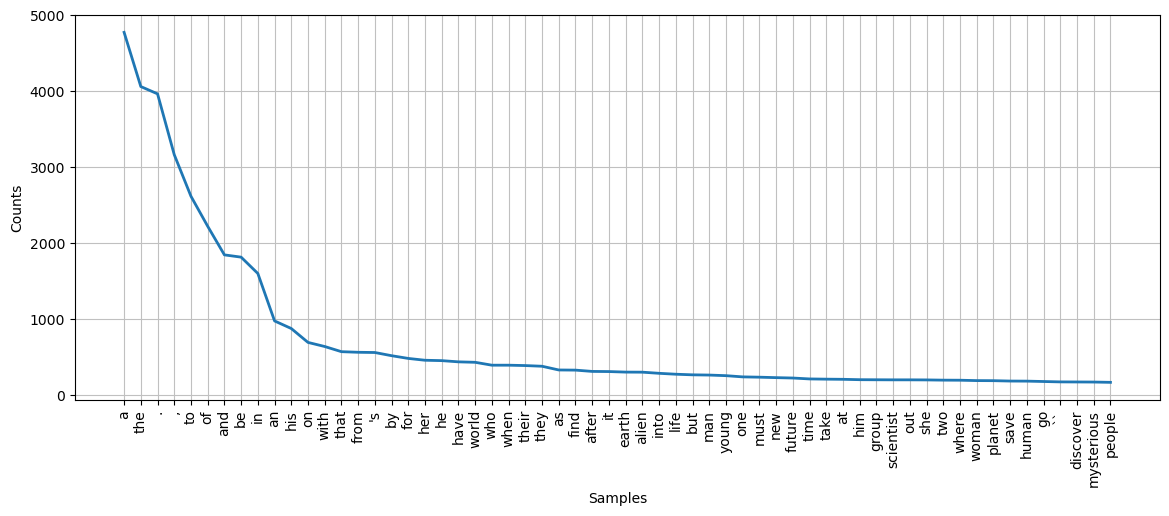

In [ ]:
plt.figure(figsize=(14,5))
freq_dist.plot(60)
#plt.xticks(rotation=45, ha="right")
plt.show()

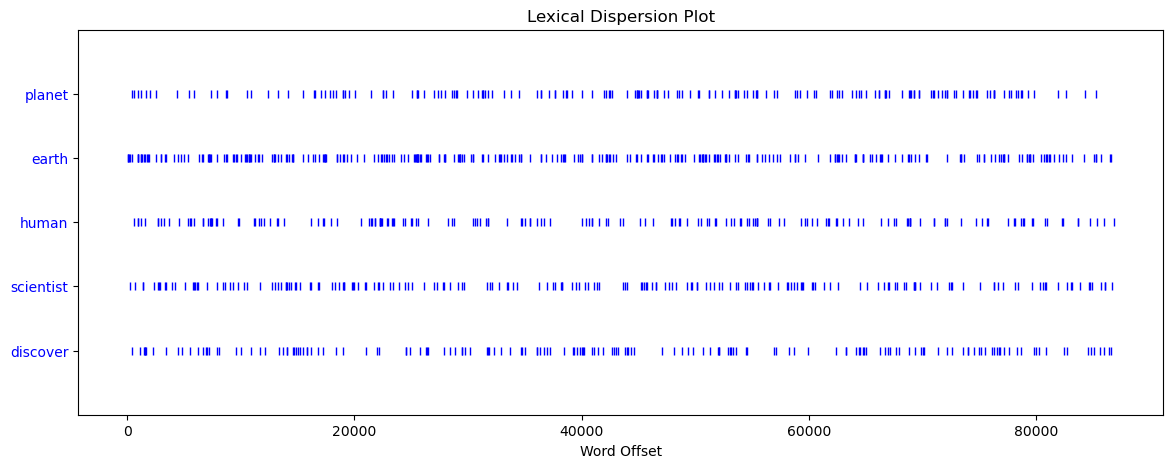

In [ ]:
plt.figure(figsize=(14,5))
nltk_text = nltk.Text(lexicon['scifi'])
nltk_text.dispersion_plot(['planet', 'earth', 'human', 'scientist', 'discover'])
plt.show()

In [ ]:
from nltk.collocations import *

tokenized_text = lexicon['scifi']

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

b = BigramCollocationFinder.from_words(tokenized_text)
b.apply_freq_filter(10)
b.nbest(bigram_measures.pmi, 10)

t = TrigramCollocationFinder.from_words(tokenized_text)
t.apply_freq_filter(5)
t.nbest(bigram_measures.pmi, 10)

b.nbest(bigram_measures.pmi, 10),t.nbest(bigram_measures.pmi, 10)


([('synopsis', '»'),
  ('los', 'angeles'),
  ('full', 'synopsis'),
  ('artificial', 'intelligence'),
  ('bounty', 'hunter'),
  ('science', 'fiction'),
  ('post', 'apocalyptic'),
  ('serial', 'killer'),
  ('video', 'game'),
  ('under', 'wrap')],
 [('full', 'synopsis', '»'),
  ('see', 'full', 'synopsis'),
  ('go', 'horribly', 'wrong'),
  ('...', 'see', 'full'),
  ('keep', 'under', 'wrap'),
  ('turn', 'upside', 'down'),
  ('high', 'school', 'student'),
  ('not', 'too', 'distant'),
  ('plot', 'keep', 'under'),
  ('plot', 'under', 'wrap')])

### Export:

In [ ]:
# to csv
#df_train.to_csv('movies_train_set.csv')
#df_test.to_csv('movies_test_set.csv')
#df_val.to_csv('movies_val_set.csv')